# Vyhodnotenie výkonových dopadov

## Úvod

V rámci diplomovej práce sme vytvorili sadu CLI skriptov umožňujúcich používateľovi aplikovať a deaplikovať vybrané skupiny pravidiel na základe rôznych atribútov pravidla a jeho hodnoty. Následne sme otestovali použitie nástroja na redukciu použitej detekčnej sady formou deaktivácie pravidiel, ktoré sme nepovažovali za relevantné pre testovanú infraštruktúru z hľadiska bezpečnostnej závažnosti upozornení vygenerovanými pravidlom alebo z hľadiska jeho relevantnosti vzhľadom na typy zariadení a použité technológie v chránenej infraštruktúre. 

Celkovo sa nám použitím vytvorenej sady CLI skriptov podarilo zredukovať detekčnú sadu o __5 957__ z pôvodných __30 793__ pravidiel na __24 836__ pravidiel, čo predstavuje redukciu použitej detekčnej sady o takmer __20%__ pravidiel. Pričom ako sme ukázali v sady rámci experimentov zameranej na otestovanie dopadov redukcie detekčnej sady na množstvo a charakter vygenerovaných upozornení táto redukcia nemala žiadne negatívne dopady na schopnosť bezpečnostných analytikov vyhodnocujúcich vygenerované upozornenia identifikovať škodlivú sieťovú premávku v sieti. 

V rámci tejto sady experimentov sme sa teda zamerali na vyhodnotenie dopadov redukcie použitej detekčnej sady pravidiel na redukciu potrebných výpočtových zdrojov systémom IDS. 

### Vykonané experimenty

Rovnako ako v prípade testovania dopadov redukcie detekčnej sady aj v tomto prípade sme vykonali testovanie v rámci navrhnutej a implementovanej testovacej ifraštruktúry s použitím pôvodného datasetu. Experiment bol vykonaný s nasledovnými parametrami:

- Rýchlosť prehrávanie dát: 100 mbps
- Nastavenie __N__ (počet analyzovaných paketov z každého toku): 100
- Počet opakovaní experimentu: 10 X

Na monitorovanie výpočtových požiadaviek systému IDS počas testovania sme použili nástroj Psrecord. Výstupu z tohto programu vo formáte txt boli predmetom výkonovej analýzi. Aby sme dosiahli istú mieru ustálenosti výsledkov meranie pre každý testovací scenár (Pondelok až Piatok) sme zopakovali 10 X pre oba testovacie prípady teda pôvodná aj redukovaná sada pravidiel. V rámci analýzi pre jednotlivé testovacie scenáre vyhodnocujeme teda výsledne kumulatívne ako súhrný záznam z jednotlivých testovaní. 

V nasledujúcej časti porovnávame využitie výpočtových prostriedkov systémom IDS počas __5. tesovacieho scenáru (Piatok)__ pri použití pôvodnej detekčnej (*df_original_disable*) sady a redukovanej detekčnej sady (*df_modified_disable*).

### Spracovanie dát

Výstupy z programu Psrecord pre jednotlivé testovacie experimenty vo formáte txt sme načítali z disku. A vytvorili sme dve dátové sady obsahujúce záznamy o spotrebe výpočtových zdrojov počas 10 vykonaní experimentu pre vybraný scenár pri aplikovaní:

  1. Pôvodnej sady pravidiel - (*df_original_disable*)
  2. Redukovanej sady pravidiel - (*df_modified_disable*)

Pod týmto blokom je uvedený formát analyzovaných dát. Ako možno vidieť záznami obsahujú diskrétne hodnoty využitia CPU a pamäte RAM systémom IDS na testovacej inštancii Flowmon Collector VA zaznamenané v čase programom Psrecord.

In [1]:
import pandas as pd
import warnings
import os
from IPython.display import display
warnings.simplefilter(action='ignore', category=FutureWarning)

folder_path_original = '/analytika/default_disable_vykonove/piatok/'
folder_path_modified = '/analytika/vykonove_meranie/piatok/testing'

def concatenate_files_in_folder(folder_path, file_extension=".txt"):    
    # List all files in the specified folder
    files = os.listdir(folder_path)

    datafiles = []
    
    # Filter files by the specified extension
    data_files = [f for f in files if f.endswith(file_extension)]

    # Initialize an empty list to store DataFrames
    dataframes = []

    # Read each file into a DataFrame and add it to the list
    for file in data_files:
        file_path = os.path.join(folder_path, file)  # Full path to the file
        df = pd.read_csv(file_path, delim_whitespace=True, comment='#')  # Read the file
        dataframes.append(df)

    # Concatenate all DataFrames into one
    concatenated_df = pd.concat(dataframes, ignore_index=True)  # Combine DataFrames with new indexing
    
    return concatenated_df

df_original_disable = concatenate_files_in_folder(folder_path_original, ".txt")  
df_modified_disable = concatenate_files_in_folder(folder_path_modified, ".txt")  

def set_columns_and_index(df, index_column):
    corrected_columns = ["Elapsed time", "CPU (%)", "Real (MB)", "Virtual (MB)"]
    # Set the corrected columns
    df.columns = corrected_columns
       
    # Set the index column if it exists in the DataFrame
    if index_column in df.columns:
        df.set_index(index_column, inplace=True)
    else:
        print(f"The '{index_column}' column was not found in the data.")

set_columns_and_index(df_original_disable,'Elapsed time')
set_columns_and_index(df_modified_disable,'Elapsed time')

# Display the first few rows to ensure thedata is loaded correctly
display(df_original_disable.head())
print()
display(df_modified_disable.head())

,CPU (%),Real (MB),Virtual (MB)
Elapsed time,,,
0.010,0.0,2121.734,2970.395
0.021,0.0,2121.734,2970.395
0.031,0.0,2121.734,2970.395
0.042,0.0,2121.734,2970.395
0.053,0.0,2121.734,2970.395


,CPU (%),Real (MB),Virtual (MB)
Elapsed time,,,
0.010,0.0,2035.66,2901.938
0.021,0.0,2035.66,2901.938
0.031,0.0,2035.66,2901.938
0.042,0.0,2035.66,2901.938
0.052,0.0,2035.66,2901.938


### Štatistické porovnanie

V nasledovnom bloku vykonávame základné štatistické porovnanie zaznamenaných údajov. Z údajov vyplíva, že redukcia použitej sady pravidiel priniesla určitú redukciu vo využití CPU systémom IDS počas testovania. 

Nakoľko spotreba pamäte RAM systémom IDS počas testovania bola konštantná a závisela primárne od rozsahu aplikovanej dátovej sady počas nasledujúceho porovnávanie dopadov redukcie detekčnej sady na výkon sa zameriavame primárne na využitie CPU systémom IDS.

In [2]:
# Summary statistics
print("\nŠtatistické zhrnutie zaznamenaných údajov o spotrebe výpočtového výkonu systémom IDS pri použití pôvodnej dátovej sady.\n")
summary = df_original_disable.describe()
print(summary)

# Summary statistics
print("\nŠtatistické zhrnutie zaznamenaných údajov o spotrebe výpočtového výkonu systémom IDS pri použití redukovanej dátovej sady.\n")
summary = df_modified_disable.describe()
print(summary)




Štatistické zhrnutie zaznamenaných údajov o spotrebe výpočtového výkonu systémom IDS pri použití pôvodnej dátovej sady.

             CPU (%)     Real (MB)  Virtual (MB)
count  118252.000000  1.182520e+05  1.182520e+05
mean       22.801369  2.121734e+03  2.970395e+03
std        50.288061  4.547493e-13  9.094985e-13
min         0.000000  2.121734e+03  2.970395e+03
25%         0.000000  2.121734e+03  2.970395e+03
50%         0.000000  2.121734e+03  2.970395e+03
75%         0.000000  2.121734e+03  2.970395e+03
max       669.700000  2.121734e+03  2.970395e+03

Štatistické zhrnutie zaznamenaných údajov o spotrebe výpočtového výkonu systémom IDS pri použití redukovanej dátovej sady.

             CPU (%)  Real (MB)  Virtual (MB)
count  117291.000000  117291.00  1.172910e+05
mean       22.490994    2035.66  2.901938e+03
std        49.589124       0.00  1.364248e-12
min         0.000000    2035.66  2.901938e+03
25%         0.000000    2035.66  2.901938e+03
50%         0.000000    2035.66  2.9

### Rozšírené porovnanie

V nasledovnom bloku vykonávame rozšírené štatistické porovnanie zaznamenaných údajov ako identifikácia outlier hodnôt vo využití CPU systémom IDS.

In [3]:
# Calculate the interquartile range (IQR) to identify outliers
q1 = df_original_disable['CPU (%)'].quantile(0.25)
q3 = df_original_disable['CPU (%)'].quantile(0.75)
iqr = q3 - q1

# Define outliers as those outside 1.5 * IQR
outliers = df_original_disable[(df_original_disable['CPU (%)'] < (q1 - 1.5 * iqr)) | (df_original_disable['CPU (%)'] > (q3 + 1.5 * iqr))]
print("Outlier hodnoty vo využití CPU pri aplikovaní pôvodnej sady pravidiel:\n", outliers)

# Calculate the interquartile range (IQR) to identify outliers
q1 = df_modified_disable['CPU (%)'].quantile(0.25)
q3 = df_modified_disable['CPU (%)'].quantile(0.75)
iqr = q3 - q1

# Define outliers as those outside 1.5 * IQR
outliers = df_modified_disable[(df_modified_disable['CPU (%)'] < (q1 - 1.5 * iqr)) | (df_modified_disable['CPU (%)'] > (q3 + 1.5 * iqr))]
print("\nOutlier hodnoty vo využití CPU pri aplikovaní redukovanej sady pravidiel:\n", outliers)



Outlier hodnoty vo využití CPU pri aplikovaní pôvodnej sady pravidiel:
               CPU (%)  Real (MB)  Virtual (MB)
Elapsed time                                  
0.324            94.1   2121.734      2970.395
0.769            91.8   2121.734      2970.395
0.997            91.7   2121.734      2970.395
1.928            91.5   2121.734      2970.395
2.340            92.4   2121.734      2970.395
...               ...        ...           ...
136.732          95.0   2121.734      2970.395
136.742          95.0   2121.734      2970.395
136.763          94.8   2121.734      2970.395
136.784          96.1   2121.734      2970.395
136.816          93.8   2121.734      2970.395

[23070 rows x 3 columns]

Outlier hodnoty vo využití CPU pri aplikovaní redukovanej sady pravidiel:
               CPU (%)  Real (MB)  Virtual (MB)
Elapsed time                                  
1.155            91.0    2035.66      2901.938
1.166            90.9    2035.66      2901.938
1.828            91.9    20

### Distribúcia hodnôt vyžitia CPU

V nasledovnom bloku uvádzame grafické znázornenie distribúcie hodnôť využitia CPU systémom IDS počas jednotlivých meraní na základe výstupov z programu Psrecord. 

Ako možno identifikovať z obrázkov spotreba CPU bola počas veľkej časti merania nulová, čo z časti znázorňuje čas počas ktorého síce bolo zaznamenávané vyťaženie CPU systémom IDS ale z dôvodu absencie aktívnej sieťovej premávky na sieťovom segmente analyzovaného sieťovou sondou v tom čase systém IDS neporovnával žiadnu sieťovú premávku voči použitej sade pravidiel. Ďalej prítomnosť nulových hodnôt spotrebz CPU v zázname vyplíva aj z diskrétnosti charakteru zaznamenávania tejto spotreby v čase programom Psrecord. Avšak rovnako možno identifikovať koncentrácie zvýšeného využitia CPU systémom IDS (_100%_, _200%_) počas spracovávania sieťovej premávky systémom IDS.

Z grafov vyplíva, že distribúcia dát je veľmi podobná, teda že dopad redukcie detekčnej sady v rámci testovacieho scenáru nemal zásadný vplyv na redukciu spotreby CPU systémom IDS.

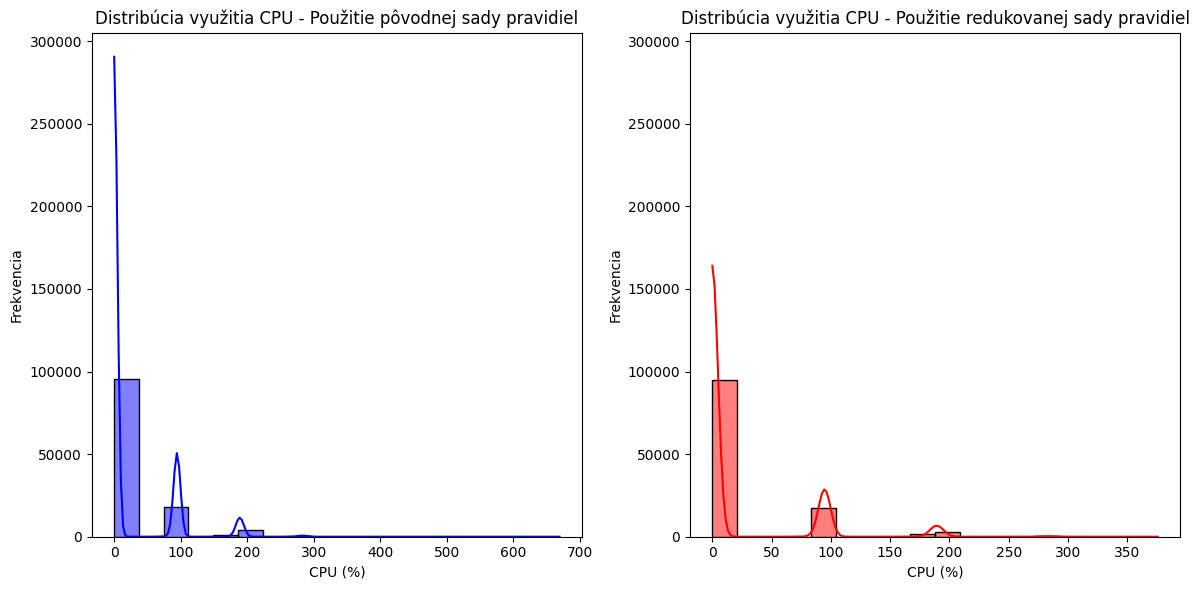

Počet nulových hodnôt využitia CPU pri aplikovaní pôvodnej sady pravidiel:  95182
Počet nulových hodnôt využitia CPU pri aplikovaní redukovanej sady pravidiel:  94603
Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní pôvodnej sady pravidiel: 80.49%
Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní redukovanej sady pravidiel:  80.66%


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust size as needed

# Plot histogram with KDE for the first dataset
sns.histplot(df_original_disable['CPU (%)'], kde=True, color='b', ax=ax1)
ax1.set_title("Distribúcia využitia CPU - Použitie pôvodnej sady pravidiel")
ax1.set_xlabel("CPU (%)")
ax1.set_ylabel("Frekvencia")

# Plot histogram with KDE for the second dataset
sns.histplot(df_modified_disable['CPU (%)'], kde=True, color='r', ax=ax2)
ax2.set_title("Distribúcia využitia CPU - Použitie redukovanej sady pravidiel")
ax2.set_xlabel("CPU (%)")
ax2.set_ylabel("Frekvencia")

y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

count_zeros_df1 = (df_original_disable['CPU (%)'] == 0).sum()
count_zeros_df2 = (df_modified_disable['CPU (%)'] == 0).sum()

# Calculate the total number of data points in each dataset
total_count_df1 = len(df_original_disable['CPU (%)'])
total_count_df2 = len(df_modified_disable['CPU (%)'])

# Calculate the proportion of zeros in each dataset
proportion_zeros_df1 = count_zeros_df1 / total_count_df1  # Proportion of zeros in Dataset 1
proportion_zeros_df2 = count_zeros_df2 / total_count_df2  # Proportion of zeros in Dataset 2

# Display the results
print("Počet nulových hodnôt využitia CPU pri aplikovaní pôvodnej sady pravidiel: ", count_zeros_df1)
print("Počet nulových hodnôt využitia CPU pri aplikovaní redukovanej sady pravidiel: ", count_zeros_df2)

percent_zeros_df1 = proportion_zeros_df1 * 100
percent_zeros_df2 = proportion_zeros_df2 * 100

# Print the results with two decimal places
print("Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní pôvodnej sady pravidiel: {:.2f}%".format(percent_zeros_df1))
print("Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní redukovanej sady pravidiel:  {:.2f}%".format(percent_zeros_df2))

#### Distribúcia hodnôt vyžitia CPU

V nasledovnom bloku uvádzame dodatočné grafické znázornenie distribúcie hodnôť využitia CPU systémom IDS počas jednotlivých meraní na základe výstupov z programu Psrecord. 

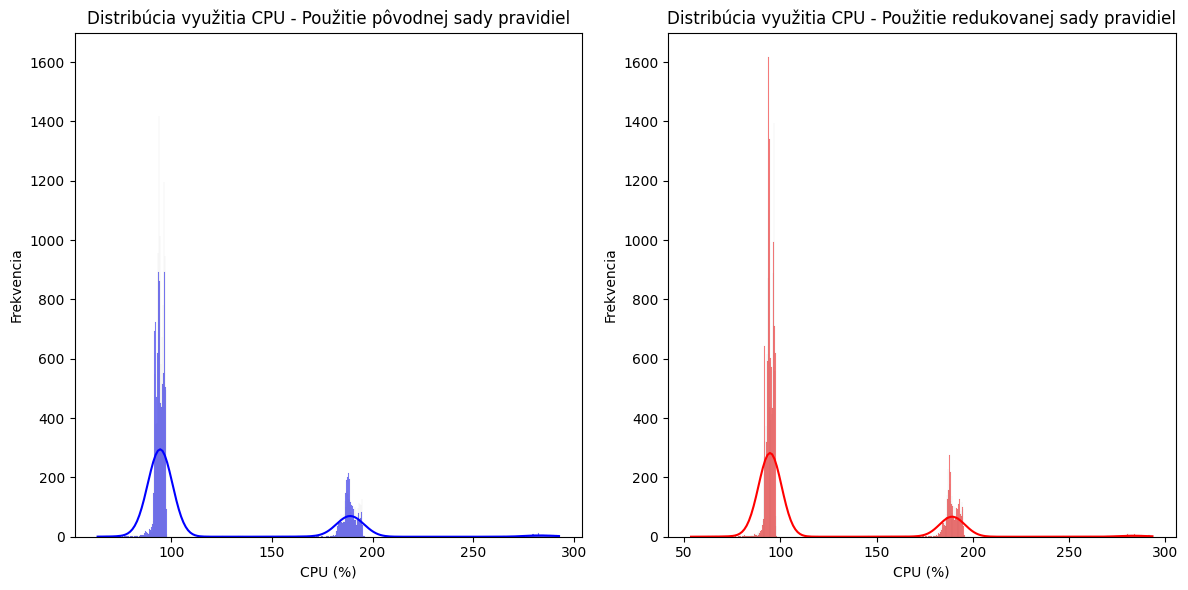

Počet nulových hodnôt využitia CPU pri aplikovaní pôvodnej sady pravidiel: 95182
Počet nulových hodnôt využitia CPU pri aplikovaní redukovanej sady pravidiel: 94603
Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní pôvodnej sady pravidiel: 80.49%
Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní redukovanej sady pravidiel: 80.66%



In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust size as needed

df_original_filtr = df_original_disable[df_original_disable['CPU (%)'] > 50]
df_modified_filtr = df_modified_disable[df_modified_disable['CPU (%)'] > 50]
df_original_filtr = df_original_filtr[df_original_filtr['CPU (%)'] < 300]
df_modified_filtr = df_modified_filtr[df_modified_filtr['CPU (%)'] < 300]


# Plot histogram with KDE for the first dataset
sns.histplot(df_original_filtr['CPU (%)'], kde=True, color='b', ax=ax1)
ax1.set_title("Distribúcia využitia CPU - Použitie pôvodnej sady pravidiel")
ax1.set_xlabel("CPU (%)")
ax1.set_ylabel("Frekvencia")

# Plot histogram with KDE for the second dataset
sns.histplot(df_modified_filtr['CPU (%)'], kde=True, color='r', ax=ax2)
ax2.set_title("Distribúcia využitia CPU - Použitie redukovanej sady pravidiel")
ax2.set_xlabel("CPU (%)")
ax2.set_ylabel("Frekvencia")


y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

count_zeros_df1 = (df_original_disable['CPU (%)'] == 0).sum()
count_zeros_df2 = (df_modified_disable['CPU (%)'] == 0).sum()

# Calculate the total number of data points in each dataset
total_count_df1 = len(df_original_disable['CPU (%)'])
total_count_df2 = len(df_modified_disable['CPU (%)'])

# Calculate the proportion of zeros in each dataset
proportion_zeros_df1 = count_zeros_df1 / total_count_df1  # Proportion of zeros in Dataset 1
proportion_zeros_df2 = count_zeros_df2 / total_count_df2  # Proportion of zeros in Dataset 2

# Display the results
print("Počet nulových hodnôt využitia CPU pri aplikovaní pôvodnej sady pravidiel:", count_zeros_df1)
print("Počet nulových hodnôt využitia CPU pri aplikovaní redukovanej sady pravidiel:", count_zeros_df2)

percent_zeros_df1 = proportion_zeros_df1 * 100
percent_zeros_df2 = proportion_zeros_df2 * 100

# Print the results with two decimal places
print("Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní pôvodnej sady pravidiel: {:.2f}%".format(percent_zeros_df1))
print("Počet nulových hodnôt (percentuálne) využitia CPU pri aplikovaní redukovanej sady pravidiel: {:.2f}%".format(percent_zeros_df2))
print()

#### Distribúcia hodnôt vyžitia CPU

V nasledovnom bloku uvádzame dodatočné grafické znázornenie distribúcie hodnôť využitia CPU systémom IDS počas jednotlivých meraní na základe výstupov z programu Psrecord. 

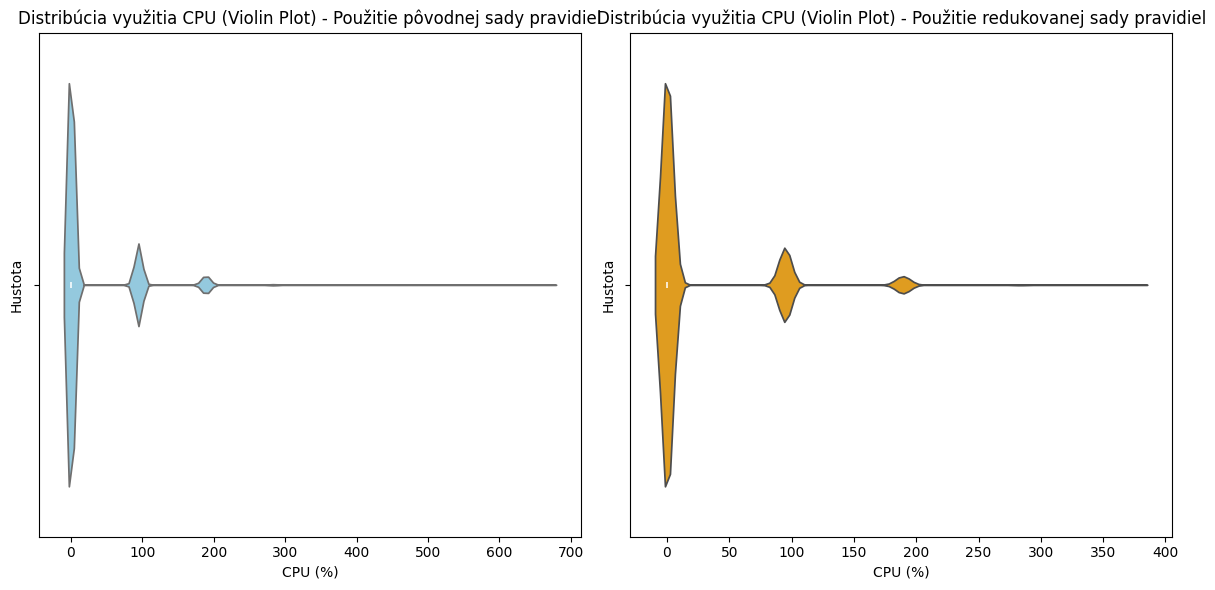

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure with 1 row and 2 columns of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the size as needed

# Violin plot for the first dataset
sns.violinplot(x=df_original_disable['CPU (%)'], color='skyblue', ax=ax1)
ax1.set_title("Distribúcia využitia CPU (Violin Plot) - Použitie pôvodnej sady pravidiel")
ax1.set_xlabel("CPU (%)")
ax1.set_ylabel("Hustota")

# Violin plot for the second dataset
sns.violinplot(x=df_modified_disable['CPU (%)'], color='orange', ax=ax2)
ax2.set_title("Distribúcia využitia CPU (Violin Plot) - Použitie redukovanej sady pravidiel")
ax2.set_xlabel("CPU (%)")
ax2.set_ylabel("Hustota")


plt.tight_layout()  # Adjust the layout to prevent overlapping of plots
plt.show()


#### Prekrývajúce sa zobrazenie porovnania hodnôt vyžitia CPU

V nasledovnom bloku uvádzame dodatočné grafické znázornenie distribúcie hodnôť využitia CPU systémom IDS počas jednotlivých meraní na základe výstupov z programu Psrecord. Ako možno vidieť z grafu pri prekrývajúcom sa zobrazení využitia CPU pri aplikovaní redukovanej detekčnej sady je spotreba CPU mierne nižšie ako pri aplikovaní pôvodnej detekčnej sady pravidiel i keď rozdiel je len minimálne badateľný voľným okom.  

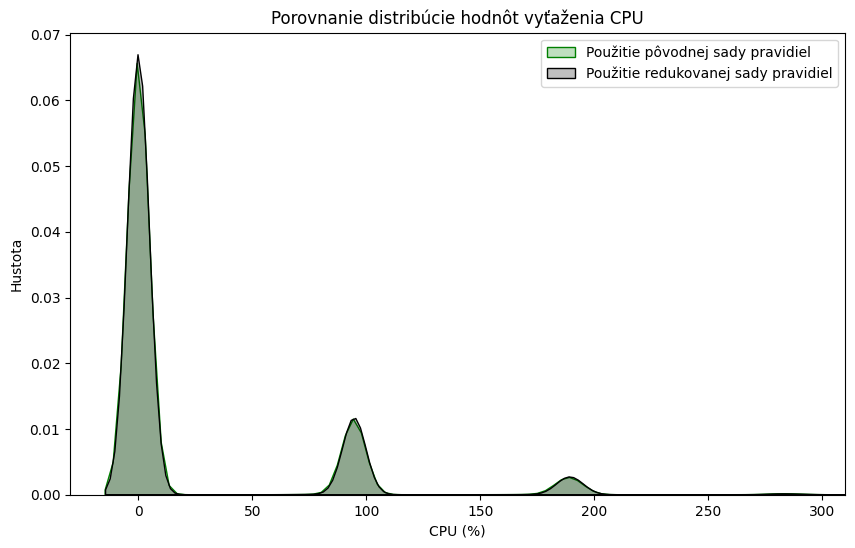

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure
plt.figure(figsize=(10, 6))

# KDE plot for the first dataset
sns.kdeplot(df_original_disable['CPU (%)'], label='Použitie pôvodnej sady pravidiel', color='green', shade=True)

# KDE plot for the second dataset
sns.kdeplot(df_modified_disable['CPU (%)'], label='Použitie redukovanej sady pravidiel', color='black', shade=True)

# Title and axis labels
plt.title("Porovnanie distribúcie hodnôt vyťaženia CPU")
plt.xlabel("CPU (%)")
plt.ylabel("Hustota")

# Add a legend to distinguish the curves
plt.legend()
plt.xlim(-30, 310)
# Show the plot
plt.show()


#### Matematické vyhodnotenie porovnania hodnôt vyžitia CPU

V nasledovnom bloku uvádzame dodatočné diskrétne porovnanie priemerného vyťaženia CPU pri použití pôvodnej a redukovanej sady pravidiel.

In [8]:
mean_df1 = df_original_disable['CPU (%)'].mean()
mean_df2 = df_modified_disable['CPU (%)'].mean()

print("Priemerné využitie CPU systémom IDS pri aplikovaní pôvodnej sady pravidiel: {:.3f}%".format(mean_df1))
print("Priemerné využitie CPU  systémom IDS pri aplikovaní redukovanej sady pravidiel: {:.3f}%".format(mean_df2))

Priemerné využitie CPU systémom IDS pri aplikovaní pôvodnej sady pravidiel: 22.801%
Priemerné využitie CPU  systémom IDS pri aplikovaní redukovanej sady pravidiel: 22.491%


#### Prekrývajúce sa zobrazenie porovnania hodnôt vyžitia CPU nad 50 %

V nasledovnom bloku uvádzame dodatočné grafické znázornenie distribúcie hodnôť využitia CPU systémom IDS počas jednotlivých meraní na základe výstupov z programu Psrecord. Ako možno vidieť z grafu pri prekrývajúcom sa zobrazení využitia CPU pri aplikovaní redukovanej detekčnej sady je spotreba CPU mierne nižšie ako pri aplikovaní pôvodnej detekčnej sady pravidiel i keď rozdiel je len minimálne badateľný voľným okom.  

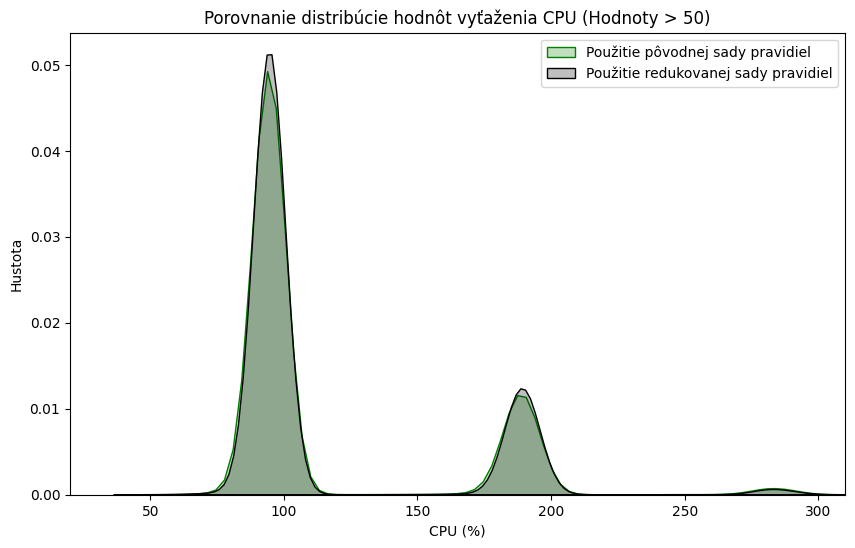

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_original_filtered = df_original_disable[df_original_disable['CPU (%)'] > 50]
df_modified_filtered = df_modified_disable[df_modified_disable['CPU (%)'] > 50]

# Create a figure
plt.figure(figsize=(10, 6))

# KDE plot for the first dataset (Original) with filtered data
sns.kdeplot(df_original_filtered['CPU (%)'], label='Použitie pôvodnej sady pravidiel', color='green', shade=True)

# KDE plot for the second dataset (Modified) with filtered data
sns.kdeplot(df_modified_filtered['CPU (%)'], label='Použitie redukovanej sady pravidiel', color='black', shade=True)

# Title and axis labels
plt.title("Porovnanie distribúcie hodnôt vyťaženia CPU (Hodnoty > 50)")
plt.xlabel("CPU (%)")
plt.ylabel("Hustota")

# Add a legend to distinguish the curves
plt.legend()
plt.xlim(20, 310)
# Display the plot
plt.show()

#### Matematické vyhodnotenie porovnania hodnôt vyžitia CPU nad 50%

V nasledovnom bloku uvádzame dodatočné diskrétne porovnanie priemerného vyťaženia CPU pri použití pôvodnej a redukovanej sady pravidiel.

In [10]:
mean_df1 = df_original_filtered['CPU (%)'].mean()
mean_df2 = df_modified_filtered['CPU (%)'].mean()

print("Priemerné využitie CPU nad 50% systémom IDS pri aplikovaní pôvodnej sady pravidiel: {:.3f}%".format(mean_df1))
print("Priemerné využitie CPU nad 50% systémom IDS pri aplikovaní redukovanej sady pravidiel: {:.3f}%".format(mean_df2))


Priemerné využitie CPU nad 50% systémom IDS pri aplikovaní pôvodnej sady pravidiel: 116.875%
Priemerné využitie CPU nad 50% systémom IDS pri aplikovaní redukovanej sady pravidiel: 116.273%


### Zhrnutie poznatkov

V nasledujúcom bloku uvádzame vyhodnotenie dopadov redukcie výkonovej sady na využitie výpočtových prostriedkov systémom IDS z hľadiska využitia CPU. 

In [11]:
mean_df1 = df_original_disable['CPU (%)'].mean()
mean_df2 = df_modified_disable['CPU (%)'].mean()

std_dev_df1 = df_original_disable['CPU (%)'].std()
std_dev_df2 = df_modified_disable['CPU (%)'].std()


print("Priemerné využitie CPU systémom IDS pri aplikovaní pôvodnej sady pravidiel: {:.3f}%".format(mean_df1))
print("Priemerné využitie CPU systémom IDS pri aplikovaní redukovanej sady pravidiel: {:.3f}%".format( mean_df2))

print("\nÚspora v priemernej spotrebe CPU vďaka reduckii aplikovanej sade pravidiel (absolútna): {:.3f}%".format(mean_df1-mean_df2))
print("Úspora v priemernej spotrebe CPU vďaka reduckii aplikovanej sade pravidiel (relatívna): {:.3f}%".format((mean_df1-mean_df2)/mean_df1*100))

Priemerné využitie CPU systémom IDS pri aplikovaní pôvodnej sady pravidiel: 22.801%
Priemerné využitie CPU systémom IDS pri aplikovaní redukovanej sady pravidiel: 22.491%

Úspora v priemernej spotrebe CPU vďaka reduckii aplikovanej sade pravidiel (absolútna): 0.310%
Úspora v priemernej spotrebe CPU vďaka reduckii aplikovanej sade pravidiel (relatívna): 1.361%


### Záver

Ako vyplíva z vykonaných experimentov v rámci testovacieho scenáru ako aj z prislúchajúcej dátovej analýzi aj relatívne malá redukcia sady pravidiel využívanej systémom IDS dokáže prispieť k zníženiu požiadaviek na výpočtový výkon systémom IDS. 